<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.2.1: Bagging

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find an answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.9667
    - **ROC AUC**  = 0.9614
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ than **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, laborious and iterative process. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario: Predicting Breast Cancer
The dataset you are going to be using for this laboratory is popularly known as the **Wisconsin Breast Cancer** dataset (`breast-cancer-wisconsin-data-old.csv`). The task related to it is Classification.

The dataset contains a total number of _10_ features labelled in either **benign** or **malignant** classes. The features have _699_ instances out of which _16_ feature values are missing. The dataset only contains numeric values.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
- Who has breast cancer? 
- What are the best predictors of breast cancer?

# Step 2: Find the Data
### Wisconsin Breast Cancer DataSet
- **Citation Request**

    This breast cancer databases was obtained from the **University of Wisconsin Hospitals**, **Madison** from **Dr. William H. Wolberg**. If you publish results when using this database, then please include this information in your acknowledgements.

- **Title**

    Wisconsin Breast Cancer Database (January 8, 1991)

- **Sources**
    - **Creator**
            Dr. William H. Wolberg (physician)
            University of Wisconsin Hospitals
            Madison, Wisconsin
            USA
    - **Donor**
            Olvi Mangasarian (mangasarian@cs.wisc.edu)
            Received by David W. Aha (aha@cs.jhu.edu)
    - **Date**
            15 July 1992
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/about) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

# Step 3: Read the Data
- Read the data (breast-cancer-wisconsin-data-old.csv)
- Perform some basic structural cleaning to facilitate the work

In [251]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [212]:
#Import data
df = pd.read_csv('/Users/annaxu/Documents/Data Science/DATA/breast-cancer-wisconsin-data-old.csv', index_col = 0)
df.head()

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Sample_number,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or spurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 699 entries, 1000025 to 897471
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump_Thickness              699 non-null    int64 
 1   Cell_Size_Uniformity         699 non-null    int64 
 2   Cell_Shape_Uniformity        699 non-null    int64 
 3   Marginal_Adhesion            699 non-null    int64 
 4   Single_Epithelial_Cell_Size  699 non-null    int64 
 5   Bare_Nuclei                  699 non-null    object
 6   Bland_Chromatin              699 non-null    int64 
 7   Normal_Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 60.1+ KB


In [217]:
#Check rows where 'Bare_Nuclei' == '?'
df[df['Bare_Nuclei'] == '?']

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
Sample_number,,,,,,,,,,
1057013,8,4,5,1,2,?,7,3,1,4
1096800,6,6,6,9,6,?,7,8,1,2
1183246,1,1,1,1,1,?,2,1,1,2
1184840,1,1,3,1,2,?,2,1,1,2
1193683,1,1,2,1,3,?,1,1,1,2
1197510,5,1,1,1,2,?,3,1,1,2
1241232,3,1,4,1,2,?,3,1,1,2
169356,3,1,1,1,2,?,3,1,1,2
432809,3,1,3,1,2,?,2,1,1,2


In [219]:
#Drop rows as there is sufficient data points
df.drop(df[df['Bare_Nuclei'] == '?'].index, inplace=True)

In [221]:
#Convert 'Bare_Nuclei' to integer type
df[['Bare_Nuclei']] = df[['Bare_Nuclei']].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 682 entries, 1000025 to 897471
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump_Thickness              682 non-null    int64
 1   Cell_Size_Uniformity         682 non-null    int64
 2   Cell_Shape_Uniformity        682 non-null    int64
 3   Marginal_Adhesion            682 non-null    int64
 4   Single_Epithelial_Cell_Size  682 non-null    int64
 5   Bare_Nuclei                  682 non-null    int64
 6   Bland_Chromatin              682 non-null    int64
 7   Normal_Nucleoli              682 non-null    int64
 8   Mitoses                      682 non-null    int64
 9   Class                        682 non-null    int64
dtypes: int64(10)
memory usage: 58.6 KB


In [223]:
df.describe()

,Clump_Thickness,Cell_Size_Uniformity,Cell_Shape_Uniformity,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000,682.000000
mean,4.444282,3.153959,3.218475,2.832845,3.236070,3.548387,3.445748,2.872434,1.604106,2.700880
std,2.822290,3.066285,2.989568,2.865805,2.224214,3.645226,2.451435,3.054065,1.733792,0.954916
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


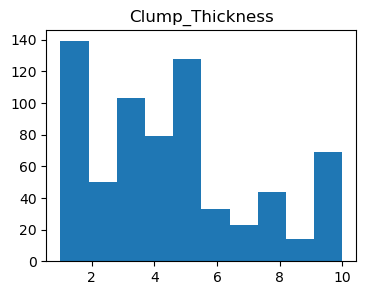

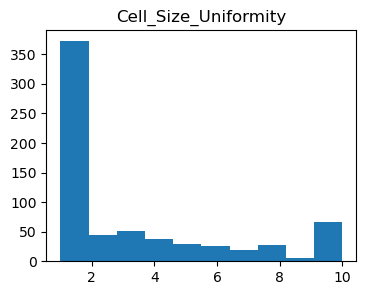

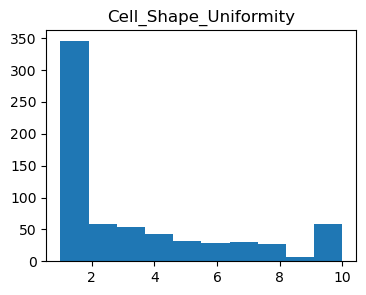

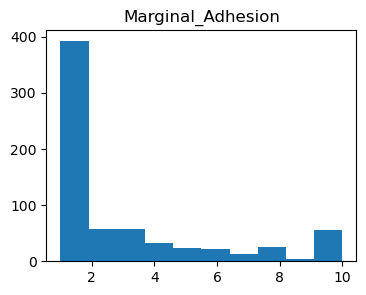

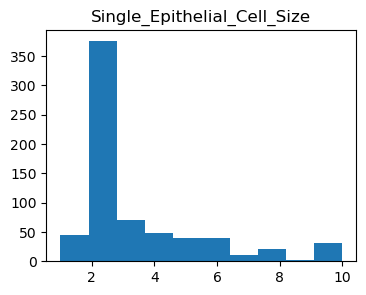

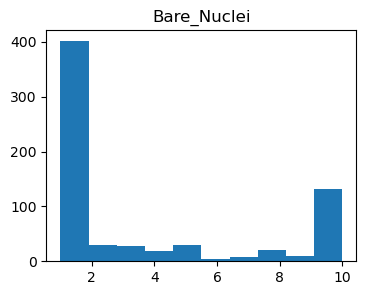

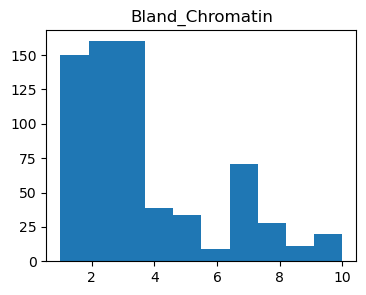

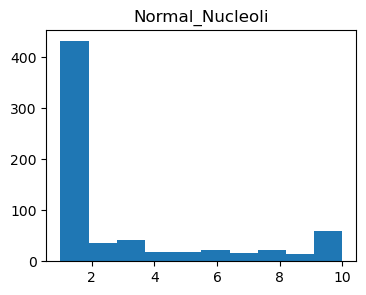

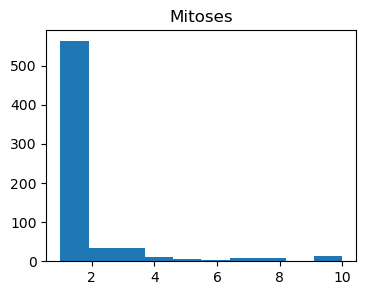

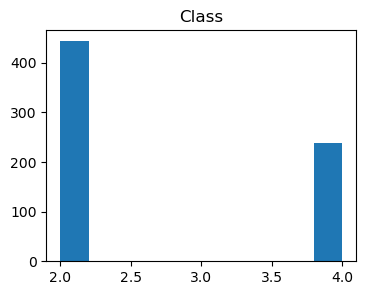

In [225]:
#Visualise distributions 
for i in df.columns:
    plt.figure(figsize=(4, 3))
    plt.title(f'{i}')
    plt.hist(df[i])
    plt.show()

In [226]:
#In 'Class', change 2 for benign to 0 and 4 for malignant to 1
df['Class'] = df['Class'].replace({2: 0, 4: 1})

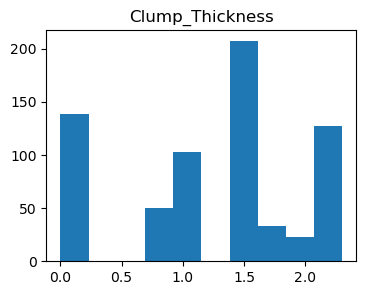

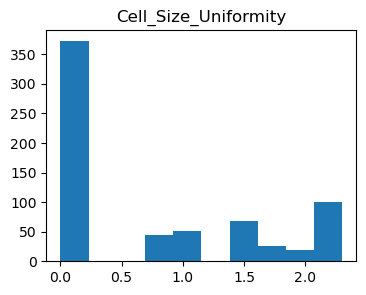

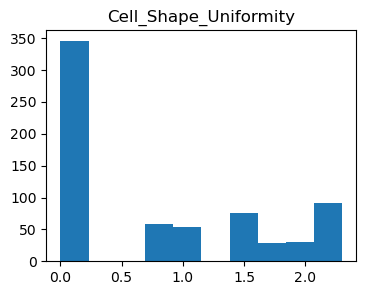

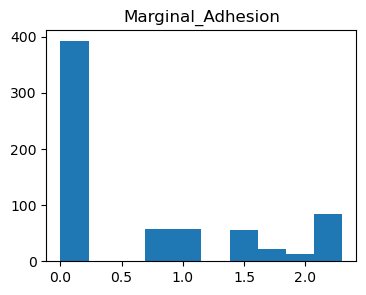

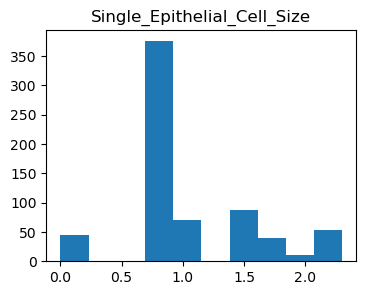

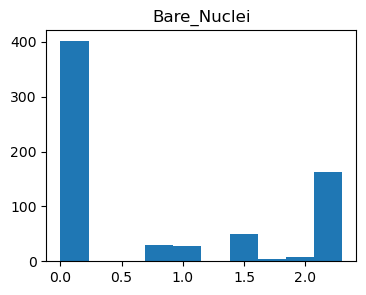

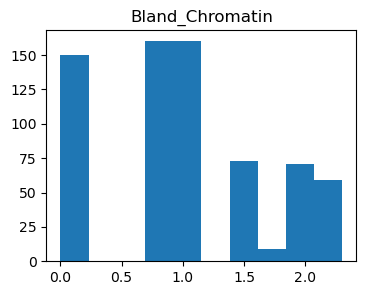

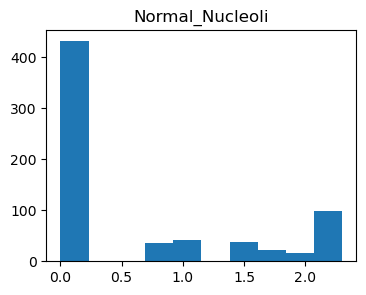

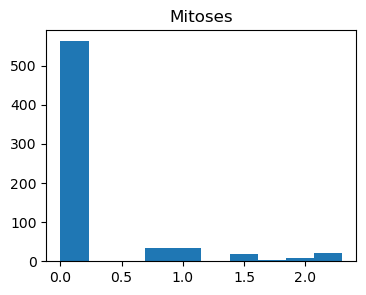

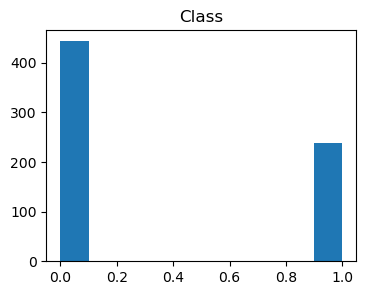

In [227]:
#Log transform all feature columns
df.loc[:, df.columns != 'Class'] = df.loc[:, df.columns != 'Class'].apply(np.log)

for i in df.columns:
    plt.figure(figsize=(4, 3))
    plt.title(f'{i}')
    plt.hist(df[i])
    plt.show()

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Feature Engineer** (if useful or necessary)

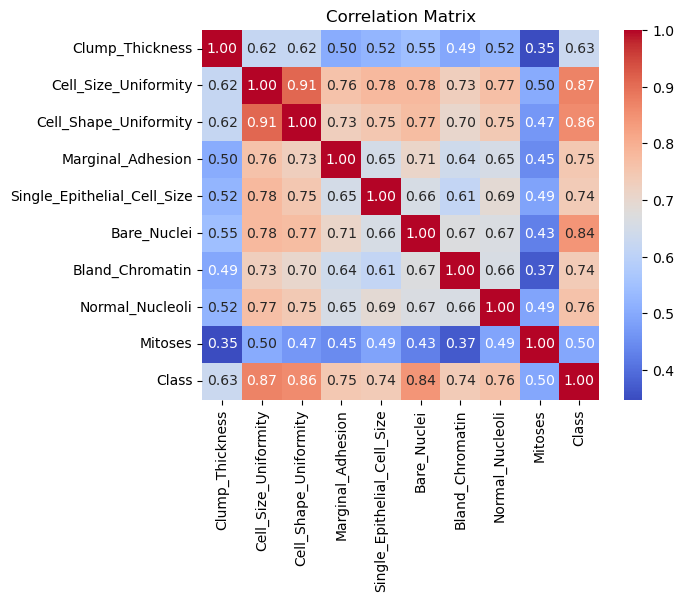

In [231]:
#Show correlation matrix
corr_matrix = df.corr() 
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Matrix')
plt.show()

In [236]:
#Drop 'Cell Shape Uniformity' and 'Cell Size Uniformity' because they have high correlation with most features
df.drop(columns = ['Cell_Shape_Uniformity', 'Cell_Size_Uniformity'], axis = 0, inplace = True)

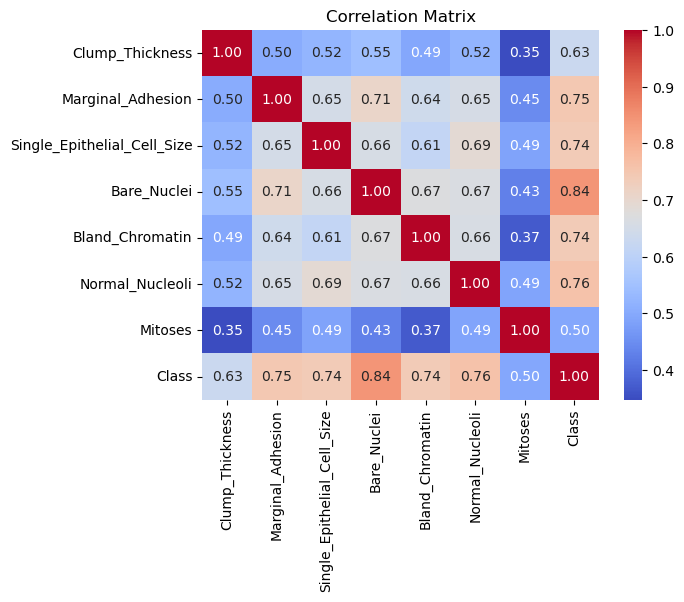

In [238]:
corr_matrix = df.corr() 
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm', fmt = '.2f')
plt.title('Correlation Matrix')
plt.show()

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)? All features except for Class
- Is there an output variable (label)? Class
- If there is an output variable:
    - What is it? Malignant (1) /benign (0) 
    - What is its type? integer
- What type of Modelling is it?
    - [x] Supervised
    - [ ] Unsupervised
- What type of Modelling is it?
    - [ ] Regression
    - [x] Classification (binary)
    - [ ] Classification (multi-class)
    - [ ] Clustering

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when splitting

In [240]:
#Check class split
df['Class'].value_counts()

Class
0    443
1    239
Name: count, dtype: int64

In [242]:
#Define target and predictor variables
X = df.drop(columns = 'Class')
y = df['Class']
#Create test/train splits
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Step 8: Define and Fit Models

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [259]:
model = BaggingClassifier(random_state = 1) #default base estimator is Decision Tree
model.fit(X_train, y_train)

BaggingClassifier(random_state=1)

# Step 9: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [263]:
y_train_pred = model.predict(X_train) 
print('Accuracy score: {:.4}'.format(accuracy_score(y_train, y_train_pred)))
print()
array = metrics.confusion_matrix(y_train, y_train_pred)
confusion_matrix = pd.DataFrame(array, columns = ['predicted_no_cancer', 'predicted_cancer'], index = ['has_no_cancer', 'has_cancer'])
print(confusion_matrix)
print()
print(classification_report(y_train, y_train_pred))

Accuracy score: 0.998

               predicted_no_cancer  predicted_cancer
has_no_cancer                  332                 0
has_cancer                       1               178

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       332
           1       1.00      0.99      1.00       179

    accuracy                           1.00       511
   macro avg       1.00      1.00      1.00       511
weighted avg       1.00      1.00      1.00       511



# Step 10: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [269]:
y_test_pred = model.predict(X_test) 
print('Accuracy score: {:.4}'.format(accuracy_score(y_test, y_test_pred)))
print()
array = metrics.confusion_matrix(y_test, y_test_pred)
confusion_matrix = pd.DataFrame(array, columns = ['predicted_no_cancer', 'predicted_cancer'], index = ['has_no_cancer', 'has_cancer'])
print(confusion_matrix)
print()
print(classification_report(y_test, y_test_pred))

Accuracy score: 0.9708

               predicted_no_cancer  predicted_cancer
has_no_cancer                  111                 0
has_cancer                       5                55

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       111
           1       1.00      0.92      0.96        60

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



# Step 11: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

The model can be used to predict whether someone has breast cancer or not.

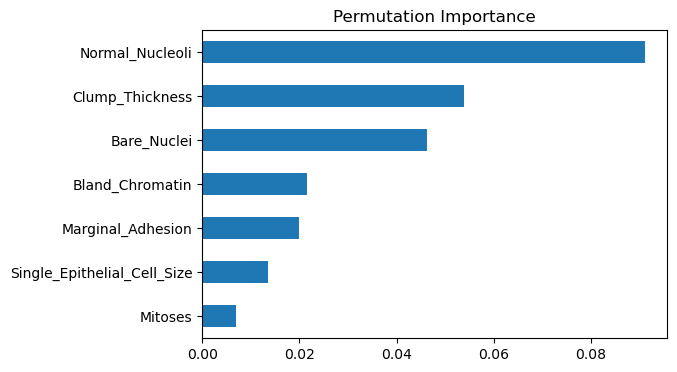

In [292]:
from sklearn.inspection import permutation_importance

result = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)
perm_importance = pd.Series(result.importances_mean, index=X_test.columns)
plt.figure(figsize = (6,4))
perm_importance.sort_values(ascending=False).plot(kind='barh')
plt.title('Permutation Importance')
plt.gca().invert_yaxis()
plt.show()



---



---



> > > > > > > > > © 2025 Institute of Data


---



---



